In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tests.test_competing_risks_model import *

%load_ext autoreload
%autoreload 2

# Simple competing risks example

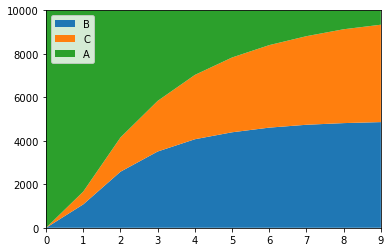

,id,sex,transition,T
0,0,0,1,4.0
1,1,1,1,5.0
2,2,0,2,5.0
3,3,1,1,2.0
4,4,0,2,1.0


In [2]:
data = create_test_data(N=10_000)
stackplot(data)
data.head()

In [3]:
data.columns

Index(['id', 'sex', 'transition', 'T'], dtype='object')

# Start some tests

In [8]:
from pymsm.competing_risks_model import CompetingRisksModel

crm = CompetingRisksModel()

In [9]:
crm.extract_necessary_attributes()

AttributeError: 'CompetingRisksModel' object has no attribute 'params_'

In [6]:
test_extract_necessary_attributes()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 524 right-censored observations>


TypeError: extract_necessary_attributes() takes 1 positional argument but 2 were given

In [ ]:
# Fit first transition
cox_model = crm.fit_event_specific_model(
event_of_interest=1,
df=data,
duration_col="T",
event_col="transition",
cluster_col="id",
verbose=0,
)

array([0.11318446, 0.30188412, 0.46268062, 0.60779543, 0.72734317,
       0.83104833, 0.92086976, 0.98180016, 1.04736096, 1.08488657,
       1.11857136, 1.15290111, 1.17305496, 1.17758177, 1.1952313 ,
       1.1952313 , 1.1952313 , 1.1952313 , 1.1952313 , 1.23527438,
       1.23527438, 1.23527438, 1.23527438, 1.23527438, 1.23527438,
       1.23527438, 1.23527438, 1.23527438, 1.23527438, 1.23527438,
       1.23527438, 1.23527438, 1.23527438, 1.23527438])